In [160]:
#importing important liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
#from py2neo import Graph, Node, Relationship,DatabaseError
import time
import utils
from sklearn.preprocessing import MinMaxScaler
import Data_Reduction
import matplotlib.pyplot as plt
import Graph_Exploration
import plotly as px
import plotly.graph_objects as go
from collections import defaultdict

In [162]:
nodes, edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
nodes.head()
print(len(edges))
edges = Data_Reduction.Remove_selfloops(edges)
#print(len(edges))
graph = utils.Create_Graph(nodes,edges)
#after removing selfloops there are nodes without any edges
#graph = Data_Reduction.Reduce_with_min_x_edges(graph,0)
# Convert graph nodes to DataFrame
#nodes_data = [(node, graph.nodes[node]) for node in graph.nodes()]
#df_nodes = pd.DataFrame(nodes_data, columns=['node', 'attributes'])

# Split attributes into separate columns
#df_nodes = pd.concat([df_nodes.drop(columns=['attributes']), df_nodes['attributes'].apply(pd.Series)], axis=1)
#df_nodes.head()

170823


In [204]:
nodes_of_interest = list(nan_G.nodes())

In [208]:
bet = nx.betweenness_centrality(graph)
bet

{0: 0.0,
 1: 0.00015292152475288886,
 2: 2.923366450302781e-06,
 3: 5.203887052568436e-05,
 4: 0.0001254308014012302,
 5: 6.315878698036437e-05,
 6: 2.295080824036124e-05,
 7: 2.766906672950792e-07,
 8: 1.1264920529218297e-05,
 9: 0.0,
 10: 0.0,
 11: 2.3252651594395661e-07,
 12: 0.0002695045029725236,
 13: 6.034602550746447e-06,
 14: 8.839418744036059e-05,
 15: 7.721961725072972e-07,
 16: 0.0,
 17: 1.6012079280013085e-05,
 18: 6.987602740697181e-06,
 19: 0.0006914866231873847,
 20: 0.0,
 21: 0.00026701873416908723,
 22: 0.00020583457486497125,
 23: 6.67514757243024e-08,
 24: 2.2801079158363892e-05,
 25: 3.7061458594103606e-05,
 26: 2.385987497149521e-07,
 27: 5.46434954119014e-05,
 28: 1.4846957390118968e-06,
 29: 0.00016092535954300558,
 30: 0.00033565384937785044,
 31: 6.538776456836311e-06,
 32: 0.0009884513307845022,
 33: 0.0,
 34: 1.6727083675108791e-07,
 35: 7.918301003057571e-05,
 36: 4.051859865170634e-05,
 37: 6.0790576884860884e-05,
 38: 5.606765830944742e-05,
 39: 0.00026643

In [176]:
Nan_nodes = nodes[nodes['betweenness_centerality'].isna()]

In [178]:
Nan_nodes.to_csv("Nan_nodes.csv")

In [181]:
nan_edges = pd.read_csv("Nan_edges.csv")

In [188]:
len(nan_G.edges())

153

In [189]:
len(nan_edges)

153

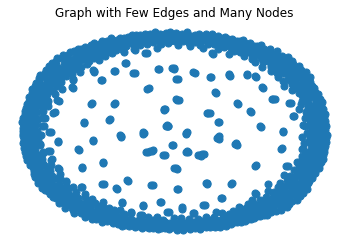

In [190]:
# Create a layout for the nodes
pos = nx.spring_layout(nan_G)

# Draw the nodes
nx.draw_networkx_nodes(nan_G, pos, node_size=50)

# Display the graph
plt.title("Graph with Few Edges and Many Nodes")
plt.axis("off")
plt.show()

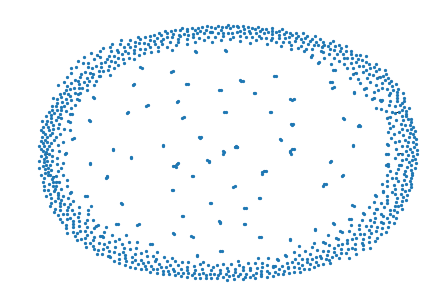

In [191]:

nan_G = utils.Create_Graph(Nan_nodes,nan_edges)
nx.draw(nan_G,node_size = 5)

In [192]:
selected_nodes = Nan_nodes['id'].tolist()

# Step 2: Filter the edges dataframe to retain only relevant edges
relevant_edges = edges[edges['source'].isin(selected_nodes) & edges['target'].isin(selected_nodes)]
relevant_edges.to_csv('Nan_edges.csv')
# Step 3: Create a new graph using the subset of nodes and filtered edges
subset_graph = nx.from_pandas_edgelist(relevant_edges, 'source', 'target', create_using=nx.Graph())

# Now subset_graph contains only the selected nodes and relevant edges

In [193]:
degree_dict = dict(graph.degree())
# Convert degree dictionary to DataFrame
degree_df = pd.DataFrame(degree_dict.items(), columns=['node', 'degree'])

# Merge the degree DataFrame with the original DataFrame on 'node_id'
result_df = pd.merge(df_nodes, degree_df, on='node', how='left')

print(result_df)

        node       facebook_id                                     page_name  \
0          0   145647315578475                      The Voice of China 中国好声音   
1          1      191483281412                 U.S. Consulate General Mumbai   
2          2   144761358898518                                          ESET   
3          3   568700043198473  Consulate General of Switzerland in Montreal   
4          4  1408935539376139             Mark Bailey MP - Labor for Miller   
...      ...               ...                                           ...   
22465  22465  1379955382222841                               Kurt Wiegel MdL   
22466  22466  1651527995097082                                dubdub Stories   
22467  22467   155369444540412            Ministerio del Interior - Paraguay   
22468  22468   175067819212798                                   Tottus Perú   
22469  22469       27208897877                             SPORT1 Doppelpass   

        page_type  degree_centerality  

In [194]:
result_df.head()

,node,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id,degree
0,0,145647315578475,The Voice of China 中国好声音,tvshow,0.000047,0.000000,0.182482,53,1
1,1,191483281412,U.S. Consulate General Mumbai,government,0.001592,0.000138,0.257752,28,34
2,2,144761358898518,ESET,company,0.000562,0.000003,0.189540,22,12
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,0.000468,0.000053,0.219007,50,10
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.002388,0.000117,0.230387,39,51


In [195]:
minimum_degree = result_df['degree'].min()
print(minimum_degree)
maximum_degree = result_df['degree'].max()
print(maximum_degree)

1
709


In [196]:
values = list(cut_sizes.values())

# Create a histogram using Plotly
fig = go.Figure(data=[go.Histogram(x=values,nbinsx=100)])
fig.update_layout(title='Histogram of cut sizes values Values', xaxis_title='Values', yaxis_title='Frequency')
fig.show()

In [197]:
len(result_df[result_df['community_id'] == 28])

695

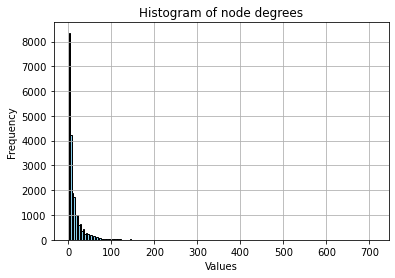

In [198]:
data = result_df['degree']

# Define histogram parameters
num_bins = 200
bin_width = (data.max() - data.min()) / num_bins
bins = [data.min() + i * bin_width for i in range(num_bins + 1)]

# Create histogram
plt.hist(data, bins=bins, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Histogram of node degrees')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show grid
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

In [199]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
data = result_df['degree']

# Create histogram
fig = go.Figure(data=[go.Histogram(x=data, nbinsx=500)])  # Adjust the 'nbinsx' parameter for more or fewer bins

# Update layout
fig.update_layout(
    title='Histogram of degrees',
    xaxis_title='Values',
    yaxis_title='Frequency',
    font=dict(
        family='Arial',
        size=12
    )
)

# Show the plot
fig.show()


In [200]:
len(result_df[result_df['degree'] == 1])

2673

In [201]:
len(df_nodes)
nodes_to_remove = [node for node, degree in dict(graph.degree()).items() if degree == 0 ]
len(nodes_to_remove)

0

In [202]:

# Subgraph induced by the nodes in the community
subgraph = graph.subgraph(community)

# Number of edges within the community
num_edges_within = subgraph.number_of_edges()

# Total possible number of edges within the community
num_nodes = len(community)
num_possible_edges_within = num_nodes * (num_nodes - 1) / 2  # For undirected graph

# Calculate density
density = num_edges_within / num_possible_edges_within


NameError: name 'community' is not defined

In [ ]:
#normalizing centrality scores
columns_to_be_normalized = ['degree_centerality', 'betweenness_centerality','closeness_centrality']
scaler = MinMaxScaler()

# Normalize the selected columns
nodes[columns_to_be_normalized] = scaler.fit_transform(nodes[columns_to_be_normalized])
nodes.head()

,id,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id
0,0,145647315578475,The Voice of China 中国好声音,tvshow,0.001412,0.000000,0.374144,53
1,1,191483281412,U.S. Consulate General Mumbai,government,0.048023,0.001227,0.706650,28
2,2,144761358898518,ESET,company,0.016949,0.000027,0.405322,22
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,0.014124,0.000467,0.535493,50
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.072034,0.001040,0.585767,39


In [ ]:
print(len(nodes[nodes['degree_centerality'] > 0.022]))
print(len(nodes[nodes['betweenness_centerality'] >  0.0756]))
print(len(nodes[nodes['closeness_centrality'] > 0.2622]))

5
2
503


In [ ]:
#sort centrality measures
#convert each measure with the node id 
betweenness_rank = dict(sorted(nodes.set_index('id')['betweenness_centerality'].to_dict().items(),  key=lambda item: item[1]))
degree_rank = dict(sorted(nodes.set_index('id')['degree_centerality'].to_dict().items(),  key=lambda item: item[1]))
closeness_rank = dict(sorted(nodes.set_index('id')['closeness_centrality'].to_dict().items(),  key=lambda item: item[1]))
print(degree_rank)


{2122: 0.0, 2222: 0.0, 2330: 0.0, 0: 0.0014124293785310763, 16: 0.0014124293785310763, 20: 0.0014124293785310763, 107: 0.0014124293785310763, 111: 0.0014124293785310763, 117: 0.0014124293785310763, 137: 0.0014124293785310763, 146: 0.0014124293785310763, 158: 0.0014124293785310763, 161: 0.0014124293785310763, 192: 0.0014124293785310763, 1411: 0.0014124293785310763, 1423: 0.0014124293785310763, 1441: 0.0014124293785310763, 1445: 0.0014124293785310763, 1499: 0.0014124293785310763, 1510: 0.0014124293785310763, 1513: 0.0014124293785310763, 1519: 0.0014124293785310763, 1523: 0.0014124293785310763, 1530: 0.0014124293785310763, 1537: 0.0014124293785310763, 1596: 0.0014124293785310763, 1607: 0.0014124293785310763, 1608: 0.0014124293785310763, 1609: 0.0014124293785310763, 1675: 0.0014124293785310763, 1682: 0.0014124293785310763, 1704: 0.0014124293785310763, 1709: 0.0014124293785310763, 1760: 0.0014124293785310763, 1770: 0.0014124293785310763, 1775: 0.0014124293785310763, 1777: 0.0014124293785310

In [ ]:
result_df[result_df['degree_centerality']== 0 ]
#print(result_df['betweenness_centerality'].min())
#print(result_df['closeness_centrality'].min())

,node,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id,degree
251,251,112856972067554,LowLow,company,0.0,0.0,0.174493,12,1
282,282,117855458231092,Jersey Couture,tvshow,0.0,0.0,0.146344,20,1
384,384,114455935321178,CDF,company,0.0,0.0,0.151805,33,1
772,772,135104556501207,Eureka Police Department,government,0.0,0.0,0.186042,34,2
923,923,90024512157,Hexaware Technologies,company,0.0,0.0,0.161893,58,1
...,...,...,...,...,...,...,...,...,...
21499,21499,119110831437170,Yumoş,company,0.0,0.0,0.139545,12,1
21617,21617,162131897284321,Ocean Spray,company,0.0,0.0,0.166401,12,1
21695,21695,48856889285,CNEWS Sport,tvshow,0.0,0.0,0.173699,21,1
21944,21944,189331987757723,OK Benzin,company,0.0,0.0,0.168400,25,1


In [ ]:
print(degree_threshold,betweenness_threshold,closeness_threshold)

0.022255674416800535 0.07565732617927307 0.2622863983195352


In [ ]:
#removing outliers
# Determine thresholds for outlier detection
degree_threshold = 2 * np.nanstd(list(betweenness_rank.values()))
betweenness_threshold = 2 * np.nanstd(list(degree_rank.values()))
closeness_threshold = 2 * np.nanstd(list(closeness_rank.values()))

# Identify outliers based on centrality thresholds
outlier_nodes = [node for node, degree in degree_rank.items() if degree > degree_threshold]
outlier_nodes += [node for node, betweenness in betweenness_rank.items() if betweenness > betweenness_threshold]
#outlier_nodes += [node for node, closeness in closeness_rank.items() if closeness > closeness_threshold]

outlier_nodes = list(set(outlier_nodes))  # Remove duplicates



In [ ]:
nodes.isna().sum()
rows_with_null = result_df[result_df.isnull().any(axis=1)]
len(rows_with_null)

1114

In [ ]:
result_df['closeness_centrality'].isna().any()

False

In [ ]:
rows_with_null.head(30)

,node,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id,degree
12,12,189778427932,Socialstyrelsen,government,NaN,NaN,0.195827,25,6
27,27,220206968012871,Poppy Cat,tvshow,NaN,NaN,0.200102,12,6
35,35,115178951868510,Omoda,company,NaN,NaN,0.201308,12,6
38,38,312747342102625,T.C. Niamey Büyükelçiliği/ Ambassade de Turqui...,government,NaN,NaN,0.197183,17,6
42,42,57816252527,Honey Bunches of Oats,company,NaN,NaN,0.219939,12,6
54,54,123185828069517,Policía de Seguridad Aeroportuaria,government,NaN,NaN,0.222920,57,6
58,58,676807905694191,Narragansett Fire Department,government,NaN,NaN,0.229198,34,6
67,67,1435115400134833,Jennifer Newman,politician,NaN,NaN,0.190467,39,6
80,80,1674951879426286,Національна поліція України,government,NaN,NaN,0.171178,19,6
92,92,181414785384715,EVA Airways Corp. 長榮航空,company,NaN,NaN,0.223512,50,6


In [ ]:
len(result_df[result_df['degree'] == 6])

1105

In [ ]:
result_df

In [ ]:
len(rows_with_null[rows_with_null['degree'] == 6])

1098

In [ ]:
plot(rows_with_null['closeness_centrality'],'Histogram of closeness centrality of nan values')

TypeError: plot() missing 1 required positional argument: 'title'

In [ ]:
#analysing outliers
outliers_df = nodes.loc[nodes['id'].isin(outlier_nodes)]
outliers_df.head()

,id,facebook_id,page_name,page_type,degree_centerality,betweenness_centerality,closeness_centrality,community_id
1,1,191483281412,U.S. Consulate General Mumbai,government,0.048023,0.001227,0.706650,28
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,0.072034,0.001040,0.585767,39
5,5,134464673284112,Victor Dominello MP,politician,0.031073,0.000581,0.576605,39
6,6,282657255260177,Jean-Claude Poissant,politician,0.022599,0.000209,0.481324,58
13,13,153345494745119,Brisbane Water LAC - NSW Police Force,government,0.024011,0.000055,0.556733,39


In [ ]:
len(set(outliers_df['community_id']))

49

<AxesSubplot:>

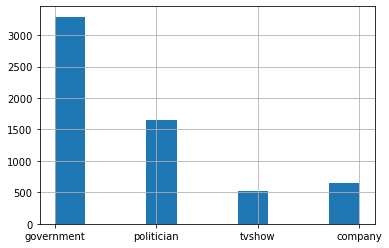

In [ ]:
outliers_df['page_type'].hist()

In [ ]:
len(set(rows_with_null['community_id']))

52

<AxesSubplot:>

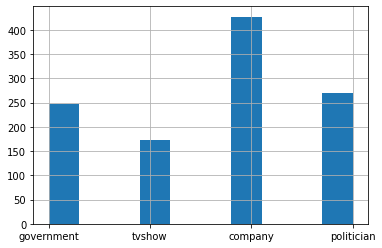

In [ ]:
rows_with_null['page_type'].hist()

In [ ]:
import plotly.graph_objects as go
def plot (result_df,column,title):
    # Assuming 'df' is your DataFrame and 'column_name' is the name of the column
    data = result_df[column]

    # Create histogram
    fig = go.Figure(data=[go.Histogram(x=data, nbinsx=500)])  # Adjust the 'nbinsx' parameter for more or fewer bins

    # Update layout
    fig.update_layout(
        title=title,
        xaxis_title='Values',
        yaxis_title='Frequency',
        font=dict(
            family='Arial',
            size=12
        )
    )

    # Show the plot
    fig.show()

In [ ]:
plot(result_df,'degree_centerality','Histogram of degree centrality')

In [ ]:
plot(result_df,'betweenness_centerality','Histogram of betweenness centerality')

In [ ]:
plot(result_df,'closeness_centrality','Histogram of closeness centrality')

In [ ]:
#calculated by gephi
'''Authority Score: This measures the quality and trustworthiness of a web page based on the number of incoming links it receives from other authoritative pages. A page with many incoming links from high-quality sources is considered to have a 
high authority score.
Hub Score: This measures the relevance and usefulness of a web page based on the number of outgoing links it contains to other relevant pages. A page that links to many other pages related to a particular 
topic is considered to have a high hub score.'''

In [ ]:
edge_betweenness = nx.edge_betweenness_centrality(graph)

# Assign edge betweenness as weights to the edges in the graph
for edge, betweenness in edge_betweenness.items():
    graph[edge[0]][edge[1]]['weight'] = betweenness

In [ ]:
edges_data = [(u, v, d['weight']) for u, v, d in graph.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Source', 'Target', 'Weight'])

# Save edges DataFrame to a CSV file
edges_df.to_csv('edges_with_edge_betweenness.csv', index=False)

In [ ]:
#remove cyles from the graph

def remove_cycles(graph):
    def dfs(node, parent, visited):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs(neighbor, node, visited):
                    return True
            elif neighbor != parent:
                # Cycle detected, remove edge (node, neighbor)
                graph.remove_edge(node,neighbor)
                graph.remove_node(neighbor)
                
                return True
        return False

    visited = set()
    for node in list(graph.nodes()):
        if node not in visited:
            dfs(node, None, visited)


In [ ]:
len(graph.nodes)

22469

In [ ]:
print("number of nodes before: ", len(graph.nodes()))
print("number of edges before:",len(graph.edges()))

boolian = remove_cycles(graph)
print(boolian)
print("number of nodes after: ", len(graph.nodes()))
print("number of edges after:",len(graph.edges()))


number of nodes before:  22469
number of edges before: 170790
None
number of nodes after:  10913
number of edges after: 5516
